In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5 MB 5.4 MB/s 
     |████████████████████████████████| 743 kB 46.8 MB/s 


**1, import thư viện cần thiết**

In [ ]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pyvi import ViTokenizer
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pickle
import nltk
from keras.layers import Dense, Embedding, LSTM, Dropout,SimpleRNN,LSTM,Bidirectional
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import tensorflow as tf
from keras.models import model_from_json

**2, Đọc dữ liệu**

In [ ]:
data = pd.read_excel('/content/Data4.xlsx')
X= data["question"].tolist()
Y= data["answer"]
print("thuộc tính điều kiện")
print(X)
print("thuộc tính cần dự đoán")
print(Y)

thuộc tính điều kiện
['Tạm biệt bot', 'Goodbye', 'Tạm biệt mày nhé bot', 'Chào tạm biệt', 'Ngày mai gặp lại nhé bot', 'Adios', 'tạm biệt, tạm biệt, tạm biệt', 'see you again', 'Tạm biệt mày nhé', 'Xin chào tạm biệt anh bạn của tôi', 'Tạm biệt', 'Tao đi đây', 'goodbye, see you again', 'phắn, phắn, phắn, phắn, phắn, phắn', 'xéo, xéo, xéo, xéo, xéo, xéo, xéo,xéo', 'lượn, lượn, lượn, cút, cút, xéo, xéo', 'cút, cút, cút, cút ,cút', 'Tạm biệt, goodbye', 'Xin chào bot, mình là Quân hiện tại mình đang cần bot tư vấn tuyển sinh', 'Chào mày, tao là học sinh tao muốn mày tư vấn', 'Mày chào tao chưa bot?', 'Xin chào bot nhé?', 'Hi?', 'Hola?', 'How are you?', 'What about you?', 'ní hảo', 'ní hảo ma', 'ní hảo ní hảo ní hảo', 'xin chào xin chào xin chào', 'hello, good morning, good afternoon', 'good morning', 'good afternoon', 'xin chào mày nhé, tao là Bình tao đang cần sự giúp đỡ từ mày?', 'mày có biết tư vấn tuyển sinh không?', 'tư vấn, tư vấn và tư vấn', 'mày hãy tư vấn cho tao', 'hello bot, tư vấ

**3,Mã hóa nhãn**

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(Y)

list_label = list(le.classes_)

print(list_label)
print(len(list_label))

label = le.transform(Y)
#print(label)

onehot_encoder = OneHotEncoder(sparse=False)
label = label.reshape(len(label), 1)
onehot_encoded = onehot_encoder.fit_transform(label)
print(onehot_encoded)

['Chỉ tiêu xét tuyển ngành công nghệ thông tin: 390', 'Chỉ tiêu xét tuyển ngành hệ thống thông tin: 120', 'Chỉ tiêu xét tuyển ngành hệ thống thông tin: 130', 'Chỉ tiêu xét tuyển ngành khoa học máy tính: 120', 'Chỉ tiêu xét tuyển ngành kỹ thuật phần mềm: 250', 'Các hoạt động ngoại khóa: CLB tin học, CLB Tiếng Anh, CLB tình nguyện, CLB văn nghệ,….', 'Các khoa thường xuyên tổ chức các chương trình văn nghệ thường niên các sinh viên giao lưu học hỏi', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.000', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.001', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.002', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.003', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.004', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.00

**4,Tiền xử lý dữ liệu**

tách từ, xử lý các ký tự (ký tự đặc biệt, viêt hoa,...) 

In [ ]:
def tienxuly(document): 
    document = ViTokenizer.tokenize(document)
    # đưa về lower
    document = document.lower()
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

In [ ]:
for i in range(0,len(X)):
  X[i] = tienxuly(X[i])

X[0:10]

['tạm_biệt bot',
 'goodbye',
 'tạm_biệt mày nhé bot',
 'chào tạm_biệt',
 'ngày_mai gặp lại nhé bot',
 'adios',
 'tạm_biệt tạm_biệt tạm_biệt',
 'see you again',
 'tạm_biệt mày nhé',
 'xin chào tạm_biệt anh bạn của tôi']

xóa bỏ các stop word tiếng việt và trong data

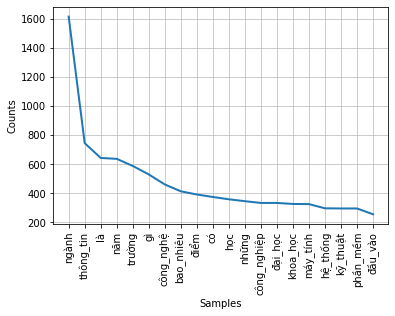

In [ ]:
tokens = []

for i in range(0,len(X)):
  for j in X[i].split():
    tokens.append(j)

freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

In [ ]:
#stopwords vietnames được lấy nguồn từ https://xltiengviet.fandom.com/wiki/Danh_s%C3%A1ch_stop_word 

stopwords_file = open("stop_words_Vietnamese.txt", "r")
content = stopwords_file.read()
stopwords_VN = content.splitlines()
stopwords_file.close()
#print(stopwords_VN)

#stopword trong documents
stopword =['nghành','ngành','trường']

stopwords = stopwords_VN + stopword

def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopwords:
            words.append(word)
    return ' '.join(words)

for i in range(0,len(X)):
  X[i]= remove_stopwords(X[i])

**5, Token dữ liệu, biến đổi đầu vào thành vector**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
text_to_sequence = tokenizer.texts_to_sequences(X)

In [ ]:
#ví dụ qua 5 từ đầu tiên
for i in range(5):
  print("\nMã hóa từ thứ: ",i)
  print("Từ gốc               : ",X[i] )
  print("Mã hóa thành các chuỗi số : ", text_to_sequence[i])


Mã hóa từ thứ:  0
Từ gốc               :  tạm_biệt bot
Mã hóa thành các chuỗi số :  [172, 97, 64]

Mã hóa từ thứ:  1
Từ gốc               :  goodbye
Mã hóa thành các chuỗi số :  [277]

Mã hóa từ thứ:  2
Từ gốc               :  tạm_biệt mày nhé bot
Mã hóa thành các chuỗi số :  [172, 97, 100, 179, 64]

Mã hóa từ thứ:  3
Từ gốc               :  chào tạm_biệt
Mã hóa thành các chuỗi số :  [136, 172, 97]

Mã hóa từ thứ:  4
Từ gốc               :  ngày_mai gặp nhé bot
Mã hóa thành các chuỗi số :  [339, 340, 341, 179, 64]


In [ ]:
#tìm chiều dài của chuỗi dài nhất
max_length_sequence = max([len(i) for i in text_to_sequence])


padded_zeros_sequence = pad_sequences(text_to_sequence, maxlen=max_length_sequence, 
                                    padding = "pre") 
padded_zeros_sequence

array([[  0,   0,   0, ..., 172,  97,  64],
       [  0,   0,   0, ...,   0,   0, 277],
       [  0,   0,   0, ..., 100, 179,  64],
       ...,
       [  0,   0,   0, ...,  97, 145,   1],
       [  0,   0,   0, ...,   8,   3,   4],
       [  0,   0,   0, ...,   8,   3,   4]], dtype=int32)

In [ ]:
max_length_sequence

30

**6, Chia tập dữ liệu thành train và test**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(padded_zeros_sequence, onehot_encoded, test_size=0.1, random_state=0)

**7, Xây dựng mô hình và kiểm định mô hình**

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
TOT_SIZE = len(tokenizer.word_index)+1

RNN

In [ ]:
def RNN_model():
    model = Sequential()
    model.add(Embedding(input_dim=TOT_SIZE,output_dim= 16, input_length=max_length_sequence))
    model.add(SimpleRNN(300))
    model.add(Dense(200,activation='relu'))
    model.add(Dense(149,activation='softmax'))
    return model
      
RNN_model = RNN_model()
RNN_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 16)            6624      
                                                                 
 simple_rnn (SimpleRNN)      (None, 300)               95100     
                                                                 
 dense (Dense)               (None, 200)               60200     
                                                                 
 dense_1 (Dense)             (None, 149)               29949     
                                                                 
Total params: 191,873
Trainable params: 191,873
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_RNN= RNN_model.fit(X_train, Y_train, epochs = 500, validation_split=0.2, batch_size=16,callbacks=callback)

Epoch 1/500
105/105 [==============================] - 4s 26ms/step - loss: 4.8535 - accuracy: 0.0214 - val_loss: 4.7907 - val_accuracy: 0.0190
Epoch 2/500
105/105 [==============================] - 2s 23ms/step - loss: 4.7887 - accuracy: 0.0190 - val_loss: 4.8190 - val_accuracy: 0.0166
Epoch 3/500
105/105 [==============================] - 2s 23ms/step - loss: 4.7717 - accuracy: 0.0190 - val_loss: 4.7666 - val_accuracy: 0.0190
Epoch 4/500
105/105 [==============================] - 2s 23ms/step - loss: 4.6807 - accuracy: 0.0298 - val_loss: 4.7397 - val_accuracy: 0.0190
Epoch 5/500
105/105 [==============================] - 2s 23ms/step - loss: 4.6505 - accuracy: 0.0304 - val_loss: 4.6974 - val_accuracy: 0.0309
Epoch 6/500
105/105 [==============================] - 2s 23ms/step - loss: 4.6544 - accuracy: 0.0202 - val_loss: 4.7093 - val_accuracy: 0.0190
Epoch 7/500
105/105 [==============================] - 2s 24ms/step - loss: 4.6321 - accuracy: 0.0310 - val_loss: 4.7217 - val_accuracy:

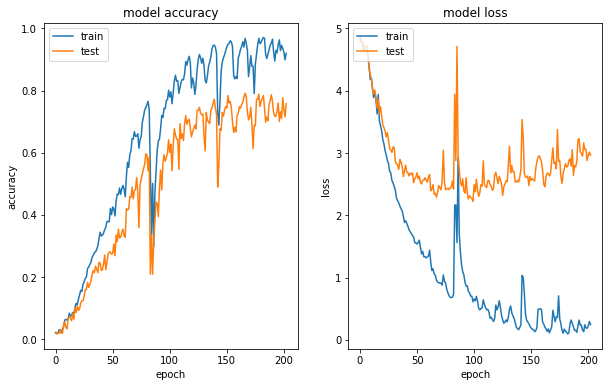

In [ ]:
#show plot
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history_RNN.history['accuracy'])
plt.plot(history_RNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_hat = history_RNN.model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(Y_test, axis=1)

# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.794872
Precision: 0.724064
Recall: 0.716990
F1 score: 0.701133


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LSTM

In [ ]:
def LSTM_model():
    model = Sequential()
    model.add(Embedding(input_dim=TOT_SIZE,output_dim= 16, input_length=max_length_sequence))
    model.add(LSTM(500))
    model.add(Dense(400,activation='relu'))
    model.add(Dense(300,activation='relu'))
    model.add(Dense(200,activation='relu'))
    model.add(Dense(149,activation='softmax'))
    return model

LSTM_model = LSTM_model()
LSTM_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 16)            6624      
                                                                 
 lstm (LSTM)                 (None, 500)               1034000   
                                                                 
 dense_2 (Dense)             (None, 400)               200400    
                                                                 
 dense_3 (Dense)             (None, 300)               120300    
                                                                 
 dense_4 (Dense)             (None, 200)               60200     
                                                                 
 dense_5 (Dense)             (None, 149)               29949     
                                                                 
Total params: 1,451,473
Trainable params: 1,451,473
No

In [ ]:
history_LSTM= LSTM_model.fit(X_train, Y_train, epochs = 500, validation_split=0.2, batch_size=32,callbacks=callback)

Epoch 1/500
53/53 [==============================] - 15s 286ms/step - loss: 4.8037 - accuracy: 0.0232 - val_loss: 4.7033 - val_accuracy: 0.0190
Epoch 2/500
53/53 [==============================] - 15s 277ms/step - loss: 4.6134 - accuracy: 0.0268 - val_loss: 4.4815 - val_accuracy: 0.0333
Epoch 3/500
53/53 [==============================] - 15s 278ms/step - loss: 4.3098 - accuracy: 0.0292 - val_loss: 4.1853 - val_accuracy: 0.0404
Epoch 4/500
53/53 [==============================] - 15s 278ms/step - loss: 3.9889 - accuracy: 0.0435 - val_loss: 3.9391 - val_accuracy: 0.0879
Epoch 5/500
53/53 [==============================] - 15s 278ms/step - loss: 3.6068 - accuracy: 0.0833 - val_loss: 3.5482 - val_accuracy: 0.0618
Epoch 6/500
53/53 [==============================] - 15s 276ms/step - loss: 3.2349 - accuracy: 0.1107 - val_loss: 3.2738 - val_accuracy: 0.1188
Epoch 7/500
53/53 [==============================] - 15s 278ms/step - loss: 2.9763 - accuracy: 0.1548 - val_loss: 3.1822 - val_accuracy:

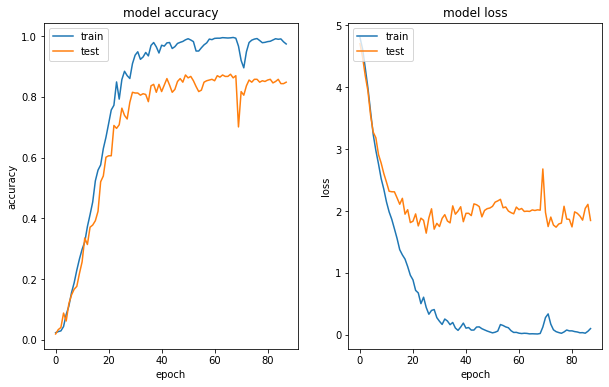

In [ ]:
#show plot
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_hat = history_LSTM.model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(Y_test, axis=1)

# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.833333
Precision: 0.702426
Recall: 0.731746
F1 score: 0.703432


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bidirectional

In [ ]:
def Bidirectional_model():
    model = Sequential()
    model.add(Embedding(input_dim=TOT_SIZE,output_dim= 16, input_length=max_length_sequence))
    model.add(Bidirectional(LSTM(500)))
    model.add(Dense(400,activation='relu'))
    model.add(Dense(300,activation='relu'))
    model.add(Dense(200,activation='relu'))
    model.add(Dense(149,activation='softmax'))
    return model
      
Bidirectional_model = Bidirectional_model()
Bidirectional_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
Bidirectional_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 16)            6624      
                                                                 
 bidirectional (Bidirectiona  (None, 1000)             2068000   
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 400)               400400    
                                                                 
 dense_7 (Dense)             (None, 300)               120300    
                                                                 
 dense_8 (Dense)             (None, 200)               60200     
                                                                 
 dense_9 (Dense)             (None, 149)               29949     
                                                      

In [ ]:
history_Bidirectional= Bidirectional_model.fit(X_train, Y_train, epochs = 500, validation_split=0.2, batch_size=32,callbacks=callback)

Epoch 1/500
53/53 [==============================] - 35s 601ms/step - loss: 4.8411 - accuracy: 0.0190 - val_loss: 4.6482 - val_accuracy: 0.0190
Epoch 2/500
53/53 [==============================] - 31s 583ms/step - loss: 4.4039 - accuracy: 0.0250 - val_loss: 4.3177 - val_accuracy: 0.0285
Epoch 3/500
53/53 [==============================] - 29s 556ms/step - loss: 4.0350 - accuracy: 0.0446 - val_loss: 4.0069 - val_accuracy: 0.0380
Epoch 4/500
53/53 [==============================] - 32s 602ms/step - loss: 3.7407 - accuracy: 0.0583 - val_loss: 3.6156 - val_accuracy: 0.1140
Epoch 5/500
53/53 [==============================] - 28s 533ms/step - loss: 3.3880 - accuracy: 0.0893 - val_loss: 3.5492 - val_accuracy: 0.0831
Epoch 6/500
53/53 [==============================] - 31s 583ms/step - loss: 3.1921 - accuracy: 0.0946 - val_loss: 3.2273 - val_accuracy: 0.1045
Epoch 7/500
53/53 [==============================] - 30s 558ms/step - loss: 3.0181 - accuracy: 0.1339 - val_loss: 3.1214 - val_accuracy:

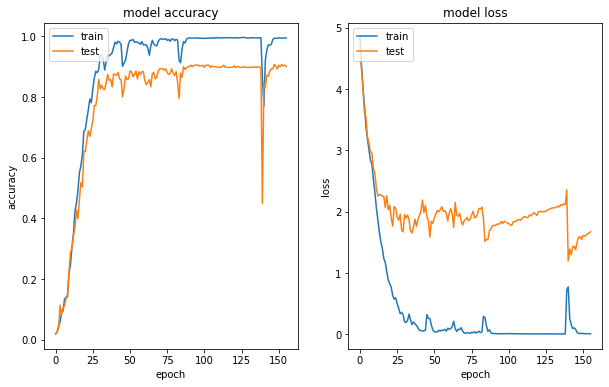

In [ ]:
#show plot
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history_Bidirectional.history['accuracy'])
plt.plot(history_Bidirectional.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(history_Bidirectional.history['loss'])
plt.plot(history_Bidirectional.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_hat = history_Bidirectional.model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(Y_test, axis=1)

# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.914530
Precision: 0.844177
Recall: 0.860561
F1 score: 0.839067


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**8, Predict thử**

In [ ]:
le.inverse_transform(np.argmax(history_Bidirectional.model.predict(X_test[0].reshape(1,30,1)), axis=1))[0]

'Sau tốt nghiệp, làm những lĩnh vực ngành hệ thống thông tin: Các doanh nghiệp thiết kế, gia công, phát triển phầm mềm'

**9, Lưu trữ các bộ trọng số và liên quan**

In [ ]:
pickle.dump(le, open('decode_label.pkl', 'wb'))
pickle.dump(tokenizer, open("decode_tokenizer.pkl", "wb"))

In [ ]:
pickle.dump(stopwords, open("stopwords.pkl", "wb"))
pickle.dump(onehot_encoded,open("one_hot_label.pkl", "wb"))

In [ ]:
pickle.dump(history_RNN, open("RNN_model.pkl", "wb"))
pickle.dump(history_LSTM, open("LSTM_model.pkl", "wb"))
pickle.dump(history_Bidirectional, open("Bi_model.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://8c1f0da0-dcfc-4a41-9362-c12516ba6ae0/assets


INFO:tensorflow:Assets written to: ram://0fb5a54c-63b6-4fab-a4d6-dc39e24b2849/assets


INFO:tensorflow:Assets written to: ram://0fb5a54c-63b6-4fab-a4d6-dc39e24b2849/assets


INFO:tensorflow:Assets written to: ram://bf807d2a-72ad-4e9b-a8f0-bf23450bd864/assets


INFO:tensorflow:Assets written to: ram://bf807d2a-72ad-4e9b-a8f0-bf23450bd864/assets


In [ ]:
history_RNN.model.save_weights("RNN_model.h5")
history_LSTM.model.save_weights("LSTM_model.h5")
history_Bidirectional.model.save_weights("BI_model.h5")

In [ ]:
model_json1 = history_RNN.model.to_json()
with open("RNN_model.json", "w") as json_file:
    json_file.write(model_json1)

In [ ]:
model_json2 = history_LSTM.model.to_json()
with open("LSTM_model.json", "w") as json_file:
    json_file.write(model_json2)

In [ ]:
model_json3 = history_Bidirectional.model.to_json()
with open("BI_model.json", "w") as json_file:
    json_file.write(model_json3)